In [117]:
import requests
import re
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt
import math

In [68]:
with open('alice.txt') as f:
    body = f.readlines()
    
# dropping underscores and excess spaces
for_next = [x.replace('\n', '').replace('_', '').replace('  ', '')  for x in body]  

# converting to paragraphs
alice = []
temp_line = ''
for line in for_next:
    if line != "":
        temp_line = temp_line + ' ' + line
    else:
        temp_line = temp_line[1:]
        alice.append(temp_line)
        temp_line = ''

alice[:3]

['Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, “and what is the use of a book,” thought Alice “without pictures or conversations?”',
 'So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her.',
 'There was nothing so very remarkable in that; nor did Alice think it so very much out of the way to hear the Rabbit say to itself, “Oh dear! Oh dear! I shall be late!” (when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but when the Rabbit actually took a watch out of its waistcoat-pocket, and looked at 

In [59]:
# text changing and filtering in one
#[x.replace('\n', '').replace('_', '').replace('  ', '')  for x in body if x.replace('\n', '')  != '']  

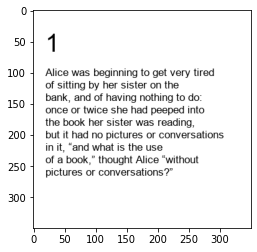

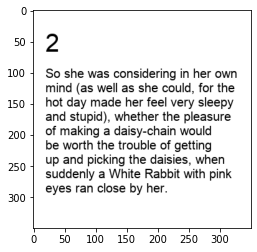

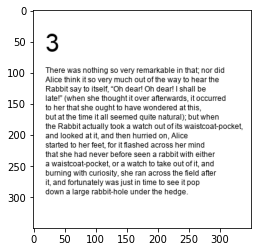

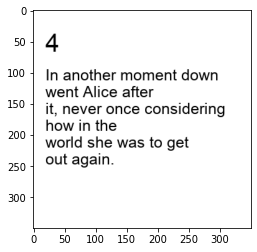

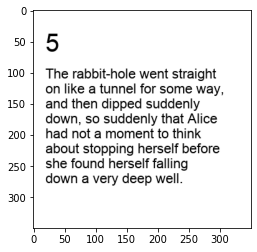

In [256]:
w = 350 # 100 pixels wide
h = 350

longest = np.max([len(x) for x in alice])

images_store = []


for image_iter in range(5):

    text = alice[image_iter]


    # split text into words
    words = text.split(' ')
    

    nchars = len(text)

    ### scaling lines and font sizes
    if nchars < 300:
        line_count = math.ceil(math.pow(nchars,0.5) / 2)
        line_len = math.ceil(nchars / (line_count))
        font_size = math.ceil(60 / math.pow(line_count,0.5))
        
    elif nchars < 600:
        line_count = math.ceil(math.pow(nchars,0.5) / 2)
        line_len = math.ceil(nchars / (line_count))
        font_size = math.ceil(50 / math.pow(line_count,0.5))
        
    else:
        line_count = math.ceil(math.pow(nchars,0.5) / 2)
        line_len = math.ceil(nchars / (line_count))
        font_size = math.ceil(42 / math.pow(line_count,0.5))

    ####if chars low...
    #font size = bigger
    #line_len = smaller
    #line_count = smaller
    

    # splitting text onto multiple rows
    lines = []
    for i in range(line_count):
        lines.append(text[i*line_len:(i+1)*line_len])


    # adding line breaks
    for z in range(1,len(lines)):
        for i in range(len(lines[z])):
            if lines[z][i] == ' ':
                prior = lines[z][:i]
                rest = lines[z][i:]
                lines[z-1] = lines[z-1] + prior
                lines[z] = rest[1:]
                break

    text_for_img = '\n'.join(lines)
    
    
    # making title
    
    
    
    
    img = Image.new('RGB', (w, h), color='white')
    image_editable  = ImageDraw.Draw(img)


    font = ImageFont.truetype('/Library/Fonts/Arial.ttf', font_size)  # source Arial font from Mac
    draw = ImageDraw.Draw(img)
    draw.text((20, 90),          # x / y
              text_for_img,
              (0,0,0),           # rgb
              font=font)
    
    
    # draw title
    font = ImageFont.truetype('/Library/Fonts/Arial.ttf', 40)
    draw = ImageDraw.Draw(img)
    draw.text((20, 30),          # x / y
              str(image_iter+1),
              (0,0,0),           # rgb
              font=font)
    

    plt.imshow(img)
    plt.show()
    
    images_store.append(img)


In [249]:
images_store



[<PIL.Image.Image image mode=RGB size=350x350 at 0x1344BC970>,
 <PIL.Image.Image image mode=RGB size=350x350 at 0x1345566D0>,
 <PIL.Image.Image image mode=RGB size=350x350 at 0x133B93A90>,
 <PIL.Image.Image image mode=RGB size=350x350 at 0x133850070>,
 <PIL.Image.Image image mode=RGB size=350x350 at 0x133DA3310>]

## The rest of this is not used

Keeping for posterity

In [6]:
response = requests.get("https://www.gutenberg.org/cache/epub/11/pg11-images.html")
corpus = response.text

In [48]:
start = re.search("Alice was beginning to get very", corpus).start()
end = re.search("THE END", corpus).start()

main_body = corpus[start:end]
main_body = main_body.replace('<i>', '')  # removing italics labels
main_body = main_body.replace('</i>', '')
main_body = main_body.replace('\xa0', '')
main_body = main_body.replace('</p>\r\n<p class="asterism">*******<br>\r\n<br>\r\n******<br>\r\n<br>\r\n*******<br></p>\r\n</div>\r\n<!--end chapter-->\r\n<div class="chapter">\r\n<h2>\r\n', '')
main_body = main_body.replace('</p>\r\n<p class="asterism">*******<br>\r\n<br>\r\n******<br>\r\n<br>\r\n*******<br>', '')

main_body = main_body.replace('\r\n        ', ' ')
main_body = main_body.replace('\r\n       ', ' ')
main_body = main_body.replace('\r\n      ', ' ')
main_body = main_body.replace('\r\n     ', ' ')
main_body = main_body.replace('\r\n    ', ' ')
main_body = main_body.replace('\r\n   ', ' ')
main_body = main_body.replace('\r\n  ', ' ')
main_body = main_body.replace('\r\n ', ' ')


main_body = main_body.replace('<a id="chap02"></a>CHAPTER II.<br>\r\nThe Pool of Tears</h2>\r\n<p>', ' ')
main_body = main_body.replace('</p>\r\n</div>\r\n<!--end chapter-->\r\n<div class="chapter">\r\n<h2>\r\n<a id="chap03"></a>CHAPTER III.<br>\r\nA Caucus-Race and a Long Tale</h2>\r\n<p>', ' ')



paragraphs = main_body.split('</p>\r\n<p>')

'</p>\r\n<p class="asterism">'


#sentence_count = np.sum([len(x.split('.')) for x in paragraphs])

paragraphs

['Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, “and what is the use of a book,” thought Alice “without pictures or conversations?”',
 'So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her.',
 'There was nothing so very remarkable in that; nor did Alice think it so very much out of the way to hear the Rabbit say to itself, “Oh dear! Oh dear! I shall be late!” (when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but when the Rabbit actually took a watch out of its waistcoat-pocket, and looked at 

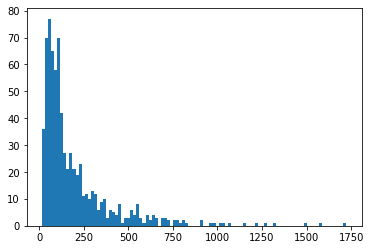

In [36]:
# look at para len
lens = [len(x) for x in paragraphs]
plt.hist(lens, bins = 100)
plt.show()